# Problem:
​This project aims to develop a machine learning model with the capability to make accurate predictions regarding the presence of Parkinson's disease in individuals based on the analysis of their voice recordings voice recordings. Parkinson's disease is a progressive neurodegenerative disorder primarily recognized for its impact on motor functions, giving rise to symptoms such as tremors, muscular rigidity, and difficulties in maintaining coordinated movements. By utilizing advanced computational techniques, this project seeks to establish a reliable tool for early detection and potential monitoring of Parkinson's disease through non-invasive voice analysis

# Step 1 | Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, precision_score, recall_score, auc,roc_curve,accuracy_score,f1_score
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from termcolor import colored
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

# Step 2 | Read Dataset

In [3]:
import pandas as pd
pd.set_option('display.max_columns',24)

In [5]:
df=pd.read_csv('parkinsons.data')
print(df.shape,'\n')
df.tail()# Hyperparameter Optimization for Logistic Regression Algorithms

(195, 24) 



,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,0.190,0.01026,0.01161,0.01373,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


# Variable	            =              Description
#name	                =        ASCII subject name and recording number
#MDVP:Fo(Hz)	        =        Average vocal fundamental frequency
#MDVP:Fhi(Hz)	        =        Maximum vocal fundamental frequency
#MDVP:Flo(Hz)	        =        Minimum vocal fundamental frequency
#MDVP:Jitter(%)	        =        measures the percentage variation in fundamental frequency
#MDVP:Jitter(Abs)	    =        the absolute value of jitter
#MDVP:RAP
#MDVP:PPQ	
#Jitter:DDP	            =         Several measures of variation in fundamental frequency
#MDVP:Shimmer	
#MDVP:Shimmer(dB)	
#Shimmer:APQ3	
#Shimmer:APQ5	
#MDVP:APQ	
#himmer:DDA	            =         Several measures of variation in amplitude
#NHR	
#HNR	                   =         Two measures of ratio of noise to tonal components in the voice
#status	                         Health status of the subject (one) - Parkinson's, (zero) - healthy
#RPDE, D2 -</strong>	   =         Two nonlinear dynamical complexity
#DFA -*	                         Signal fractal scaling exponent
#spread1,spread2,PPE	   =         Three nonlinear measures of fundamental frequency variation

In [4]:
'''
To use columns of  df more efficiently following are some changes I have done
    a. pushing target column i.e 'status' to last column
    b. converting all column names in lower case
    c. replacing spaces in column names with '_'
    d. replacing ':' in column names with '_'
    e. replacing '(' in column names with '_'
    f. replacing ')' in column names with '' i.e blank
    g. replacing '%' in column names with 'in_percent'
'''

df = df.copy()                                               # creating a copy of loanDataOrg into loanData

targetCol = 'status'                                                    # defining target column
targetColDf = df.pop(targetCol)                                     # popping target column from loanData df
df.insert(len(df.columns),targetCol, targetColDf)               # inserting target column to last column

# deleting variables that were used for changing column position of target column
del targetCol 
del targetColDf

# converting column names into lower case
df.columns = [c.lower() for c in df.columns]
# replacing spaces in column names with '_'
df.columns = [c.replace(' ', '_') for c in df.columns]
# replacing ':' in column names with '_'
df.columns = [c.replace(':', '_') for c in df.columns]
# replacing '(' in column names with '_'
df.columns = [c.replace('(', '_') for c in df.columns]
# replacing ')' in column names with '' i.e blank
df.columns = [c.replace(')', '') for c in df.columns]
# replacing '%' in column names with 'in_percent'
df.columns = [c.replace('%', 'in_percent') for c in df.columns]
# to check the above printing top 5 rows
df.head()

,name,mdvp_fo_hz,mdvp_fhi_hz,mdvp_flo_hz,mdvp_jitter_in_percent,mdvp_jitter_abs,mdvp_rap,mdvp_ppq,jitter_ddp,mdvp_shimmer,mdvp_shimmer_db,shimmer_apq3,shimmer_apq5,mdvp_apq,shimmer_dda,nhr,hnr,rpde,dfa,spread1,spread2,d2,ppe,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


# Step 3 | Dataset Overview

In [5]:
print(df.status)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    195 non-null    object 
 1   mdvp_fo_hz              195 non-null    float64
 2   mdvp_fhi_hz             195 non-null    float64
 3   mdvp_flo_hz             195 non-null    float64
 4   mdvp_jitter_in_percent  195 non-null    float64
 5   mdvp_jitter_abs         195 non-null    float64
 6   mdvp_rap                195 non-null    float64
 7   mdvp_ppq                195 non-null    float64
 8   jitter_ddp              195 non-null    float64
 9   mdvp_shimmer            195 non-null    float64
 10  mdvp_shimmer_db         195 non-null    float64
 11  shimmer_apq3            195 non-null    float64
 12  shimmer_apq5            195 non-null    float64
 13  mdvp_apq                195 non-null    float64
 14  shimmer_dda             195 non-null    fl

In [7]:
df.describe()

,mdvp_fo_hz,mdvp_fhi_hz,mdvp_flo_hz,mdvp_jitter_in_percent,mdvp_jitter_abs,mdvp_rap,mdvp_ppq,jitter_ddp,mdvp_shimmer,mdvp_shimmer_db,shimmer_apq3,shimmer_apq5,mdvp_apq,shimmer_dda,nhr,hnr,rpde,dfa,spread1,spread2,d2,ppe,status
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552,0.753846
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119,0.431878
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539,0.000000
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451,1.000000
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052,1.000000
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980,1.000000
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367,1.000000


# Note:
​

- mdvp_fo_hz : This feature represents the fundamental frequency of the voice in hertz. The data seems to have a wide range, with a relatively low standard deviation. The values are distributed around the mean, and there are no apparent outliers.

- mdvp_fhi_hz: This feature indicates the highest frequency of the voice. The data shows a broader spread, with a higher standard deviation compared to the previous feature. This could suggest more variability in this aspect of voice recordings.

- mdvp_flo(hz): This feature corresponds to the lowest frequency of the voice. Similar to the previous feature, the data displays a notable range, and the standard deviation is also relatively high.

- mdvp_Jitter(%): This feature measures the percentage variation in fundamental frequency. The low mean and relatively low standard deviation suggest that jitter values tend to be relatively consistent, although there could be some instances of higher variation.

- mdvp_Jitter(abs): This is the absolute value of jitter. The low mean and standard deviation imply generally consistent values, but there could be outliers affecting the distribution.

- mdvp_rap and mdvp_ppq: These features are related to different aspects of jitter. They exhibit similar characteristics to the previous jitter measures, with relatively low means and standard deviations.

- Jitter:DDP: This is another jitter-related feature. It correlates with the previous jitter measures, showing similar characteristics in terms of mean and standard deviation.

- mdvp_Shimmer and mdvp_Shimmer(dB): These features represent measures of voice shimmer, which relates to irregularities in amplitude. Both features show moderate means and standard deviations, indicating variability in shimmer values.

- Shimmer_dda: This is another measure of shimmer. The data distribution seems consistent with the other shimmer-related features, with a moderate spread.

- nhr: NHR stands for the ratio of noise to tonal components in the voice. The relatively low mean and standard deviation suggest that the noise-to-tonal balance tends to be consistent across recordings.

- hnr: This feature represents the harmonic-to-noise ratio. The higher mean and lower standard deviation indicate relatively consistent harmonic-to-noise ratios in the dataset.

- status: This feature likely represents the health status of individuals (1 for Parkinson's, 0 for healthy). The mean indicates that a significant portion of the dataset might have Parkinson's disease.

- rpde and dfa: These features seem to be numerical measures with moderate variability, as indicated by their standard deviations.

- spread1 and spread2: Both features show moderate variability, with spread2 having a higher mean compared to spread1.

- d2: This feature represents a dimensionality reduction measure. The data appears to have moderate variability.

- ppe: This feature is related to a nonlinear dynamical complexity measure. The data displays moderate variability.




# Step 4 | Preprocessing steps

In [8]:
df.isna().sum()### is used to calculate the sum of missing values (NaN or null values)

name                      0
mdvp_fo_hz                0
mdvp_fhi_hz               0
mdvp_flo_hz               0
mdvp_jitter_in_percent    0
mdvp_jitter_abs           0
mdvp_rap                  0
mdvp_ppq                  0
jitter_ddp                0
mdvp_shimmer              0
mdvp_shimmer_db           0
shimmer_apq3              0
shimmer_apq5              0
mdvp_apq                  0
shimmer_dda               0
nhr                       0
hnr                       0
rpde                      0
dfa                       0
spread1                   0
spread2                   0
d2                        0
ppe                       0
status                    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [67]:
# checking skewness of the data
df.skew().sort_values(ascending=False)

nhr                       4.220709
jitter_ddp                3.362058
mdvp_rap                  3.360708
mdvp_jitter_in_percent    3.084946
mdvp_ppq                  3.073892
mdvp_jitter_abs           2.649071
mdvp_apq                  2.618047
mdvp_fhi_hz               2.542146
mdvp_shimmer_db           1.999389
shimmer_apq5              1.798697
mdvp_shimmer              1.666480
shimmer_dda               1.580618
shimmer_apq3              1.580576
mdvp_flo_hz               1.217350
ppe                       0.797491
mdvp_fo_hz                0.591737
spread1                   0.432139
d2                        0.430384
spread2                   0.144430
name                      0.000000
dfa                      -0.033214
rpde                     -0.143402
hnr                      -0.514317
status                   -1.187727
dtype: float64

C:\Users\ANIKET\AppData\Local\Temp\ipykernel_25052\1964317345.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature


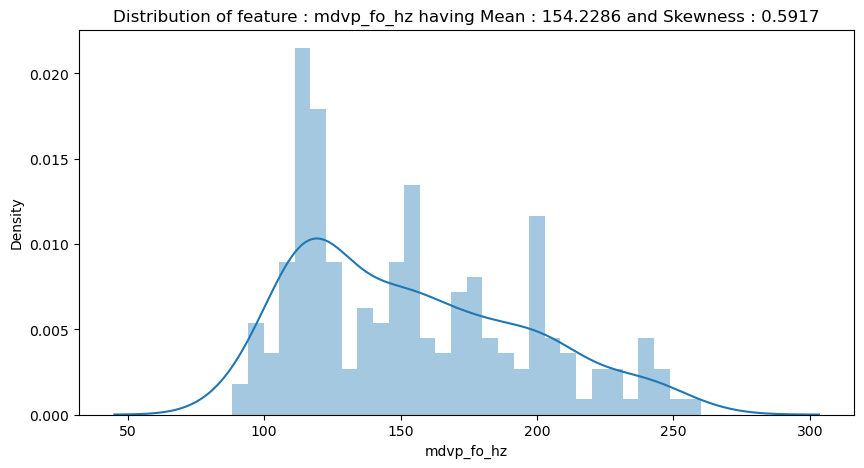

In [11]:
feature = 'mdvp_fo_hz'
meanData = 'Mean : ' + str(round(df[feature].mean(),4))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(df[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(df[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

C:\Users\ANIKET\AppData\Local\Temp\ipykernel_25052\782585184.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[df['status'] == 0][feature], bins=30, kde=True, label='Healthy')
C:\Users\ANIKET\AppData\Local\Temp\ipykernel_25052\782585184.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns

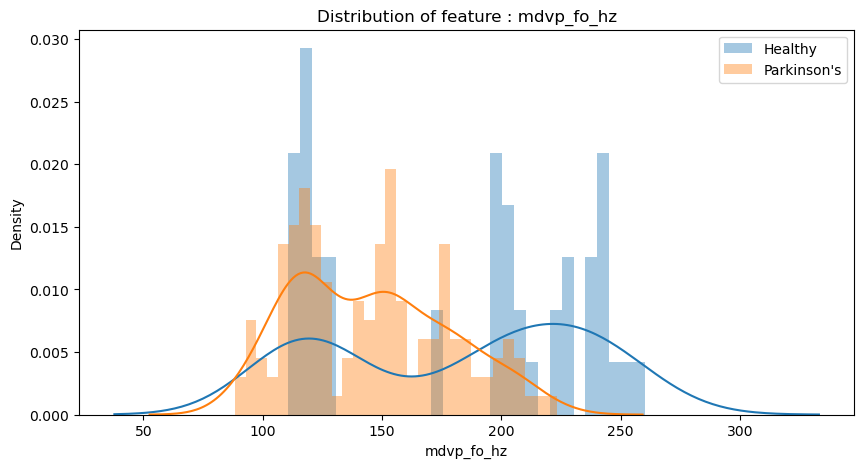

In [12]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(df[df['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(df[df['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

status                         0           1
mdvp_fo_hz                                  
mdvp_fo_hz : 50-100     0.000000  100.000000
mdvp_fo_hz : 100-150   19.565217   80.434783
mdvp_fo_hz : 150-200   11.475410   88.524590
mdvp_fo_hz : 200-250   65.625000   34.375000
mdvp_fo_hz : 250-300  100.000000    0.000000


Text(0.5, 1.0, 'PD status with different mdvp_fo_hz group')

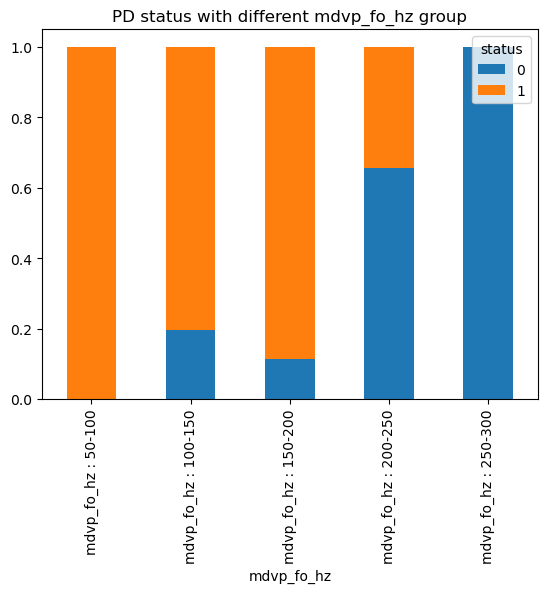

In [13]:
bins = [50,100,150,200,250,300]                                         # defining mdvp_fo_hz bins,
# defining labels of mdvp_fo_hz groups as per bins defined as above
mdvp_fo_hz_group = ['mdvp_fo_hz : 50-100', 'mdvp_fo_hz : 100-150', 'mdvp_fo_hz : 150-200', 'mdvp_fo_hz : 200-250', 'mdvp_fo_hz : 250-300']
pdData_mdvp_fo_hz_bin = pd.cut(df.mdvp_fo_hz,bins,labels=mdvp_fo_hz_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to mdvp_fo_hz_group_col variable
mdvp_fo_hz_group_col = pd.crosstab(pdData_mdvp_fo_hz_bin,df.status).apply(lambda r: r/r.sum()*100, axis=1)
print(mdvp_fo_hz_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
mdvp_fo_hz_group_col.div(mdvp_fo_hz_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different mdvp_fo_hz group")





# Note:

We can find out the following from the above crosstab: All the patient with Average vocal fundamental frequency (mdvp_fo_hz) group between 50-100 are having Parkinson's disease. Average vocal fundamental frequency (mdvp_fo_hz) group between 150-200 having second higest Parkinson's patient with percentage of 88.525, followed by Average vocal fundamental frequency (mdvp_fo_hz) group between 100-150 having Parkinson's patient with percentage of 80.435 . Average vocal fundamental frequency (mdvp_fo_hz) group between 200-250 having Healthy patient with percentage of 65.625 . All the patient with Average vocal fundamental frequency (mdvp_fo_hz) group between 250-300 are Healthy.

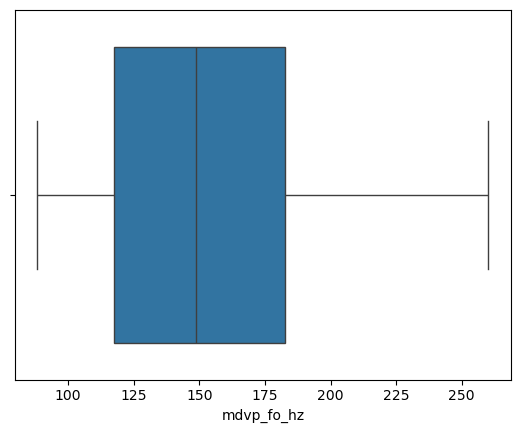

In [14]:
ax = sns.boxplot(x=df[feature])        # seaborn boxplot to examine outliers of the feature

<Axes: xlabel='status', ylabel='mdvp_fo_hz'>

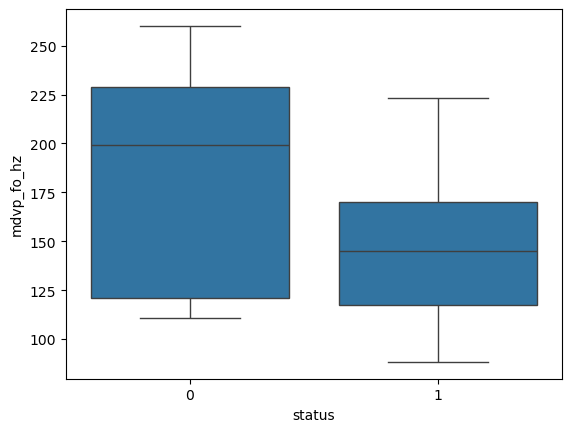

In [15]:
sns.boxplot(x=df['status'],y=df[feature]) 

C:\Users\ANIKET\AppData\Local\Temp\ipykernel_25052\2224559990.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature


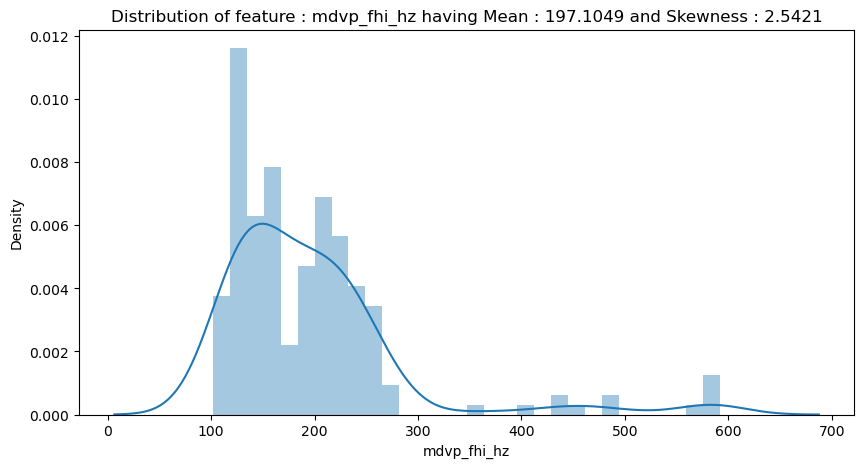

In [16]:
feature = 'mdvp_fhi_hz'
meanData = 'Mean : ' + str(round(df[feature].mean(),4))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(df[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(df[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

C:\Users\ANIKET\AppData\Local\Temp\ipykernel_25052\782585184.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[df['status'] == 0][feature], bins=30, kde=True, label='Healthy')
C:\Users\ANIKET\AppData\Local\Temp\ipykernel_25052\782585184.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns

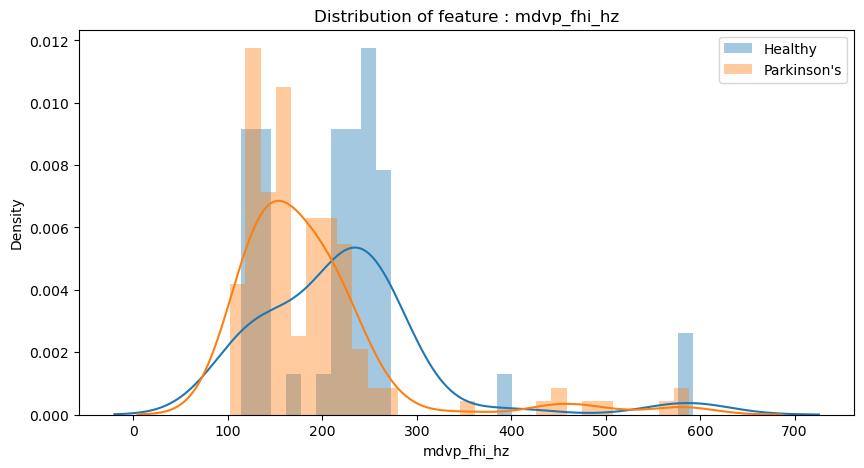

In [17]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(df[df['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(df[df['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

status                         0           1
mdvp_fhi_hz                                 
mdvp_fhi_hz : 100-200  12.931034   87.068966
mdvp_fhi_hz : 200-300  44.776119   55.223881
mdvp_fhi_hz : 300-400  50.000000   50.000000
mdvp_fhi_hz : 400-500   0.000000  100.000000
mdvp_fhi_hz : 500-600  40.000000   60.000000


Text(0.5, 1.0, 'PD status with different mdvp_fhi_hz group')

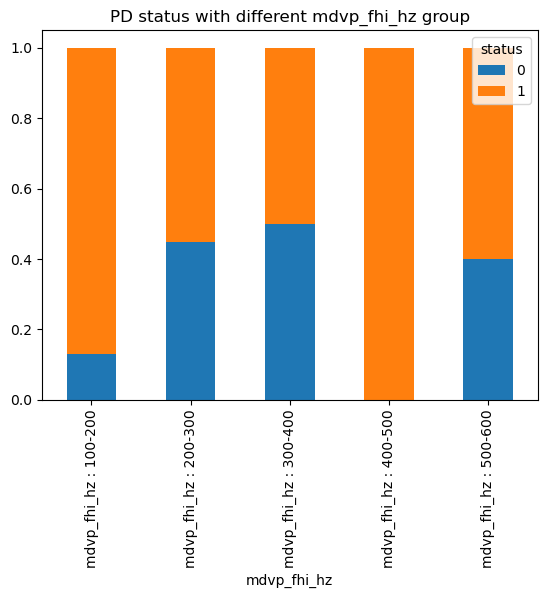

In [18]:
bins = [100,200,300,400,500,600]                                         # defining mdvp_fhi_hz bins,
# defining labels of mdvp_fhi_hz groups as per bins defined as above
mdvp_fhi_hz_group = ['mdvp_fhi_hz : 100-200', 'mdvp_fhi_hz : 200-300', 'mdvp_fhi_hz : 300-400', 'mdvp_fhi_hz : 400-500',
                     'mdvp_fhi_hz : 500-600']
pdData_mdvp_fhi_hz_bin = pd.cut(df[feature],bins,labels=mdvp_fhi_hz_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to mdvp_fhi_hz_group_col variable
mdvp_fhi_hz_group_col = pd.crosstab(pdData_mdvp_fhi_hz_bin,df.status).apply(lambda r: r/r.sum()*100, axis=1)
print(mdvp_fhi_hz_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
mdvp_fhi_hz_group_col.div(mdvp_fhi_hz_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different mdvp_fhi_hz group") 


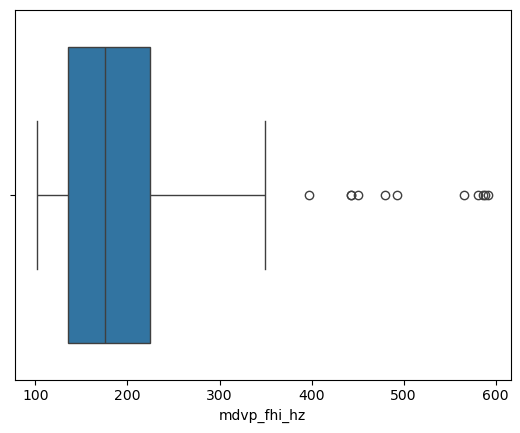

In [19]:
ax = sns.boxplot(x=df[feature])        # seaborn boxplot to examine outliers of the feature

<Axes: xlabel='status', ylabel='mdvp_fhi_hz'>

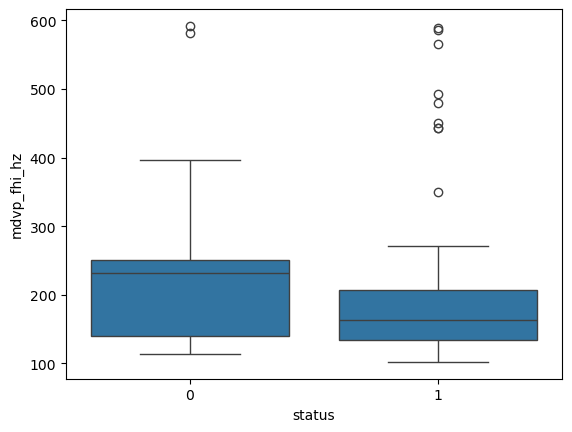

In [20]:
sns.boxplot(x=df['status'],y=df[feature]) 

In [21]:
Q1 = df[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = df[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = df[((df[feature] < (Q1 - 1.5 * IQR)) |(df[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(df[feature]),3),round(np.median(df[feature]),3),round(IQR,3))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/df[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature mdvp_fhi_hz : Mean = 197.105, Median = 175.829 and Inter-Quartile-Range (IQR) = 89.343

*****************************************************************************************************************************
There are 11 outliers (5.641 % of the data points) in mdvp_fhi_hz feature and the values are [588.518, 586.567, 492.892, 442.557, 450.247, 442.824, 479.697, 565.74, 592.03, 581.289, 396.961]
*****************************************************************************************************************************


C:\Users\ANIKET\AppData\Local\Temp\ipykernel_25052\2223103624.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature


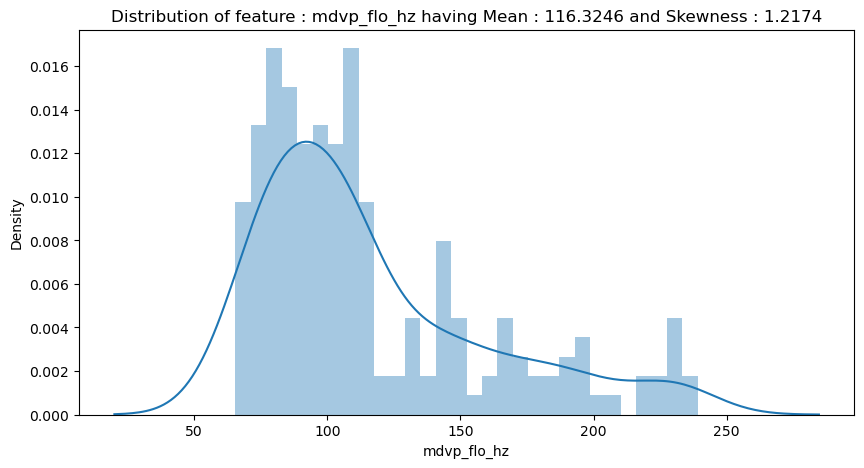

In [22]:
feature = 'mdvp_flo_hz'
meanData = 'Mean : ' + str(round(df[feature].mean(),4))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(df[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(df[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

C:\Users\ANIKET\AppData\Local\Temp\ipykernel_25052\782585184.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[df['status'] == 0][feature], bins=30, kde=True, label='Healthy')
C:\Users\ANIKET\AppData\Local\Temp\ipykernel_25052\782585184.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns

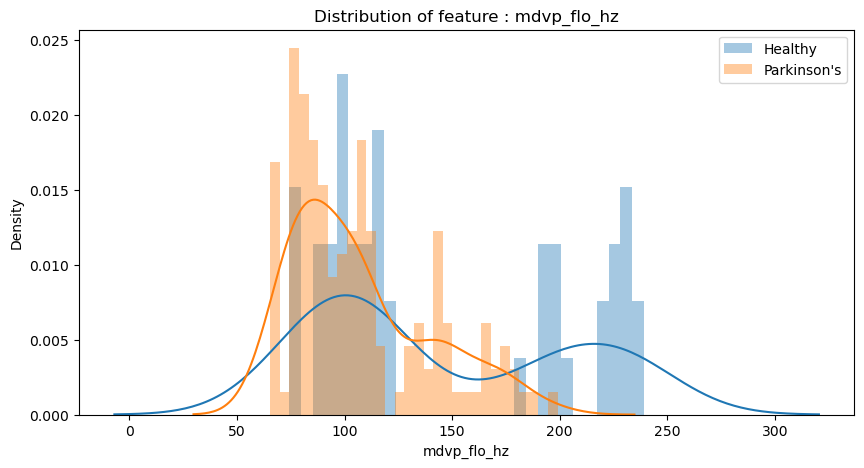

In [23]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(df[df['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(df[df['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

status                          0          1
mdvp_flo_hz                                 
mdvp_flo_hz : 50-100    16.853933  83.146067
mdvp_flo_hz : 100-150   20.000000  80.000000
mdvp_flo_hz : 150-200   29.166667  70.833333
mdvp_flo_hz : 200-250  100.000000   0.000000


Text(0.5, 1.0, 'PD status with different mdvp_flo_hz group')

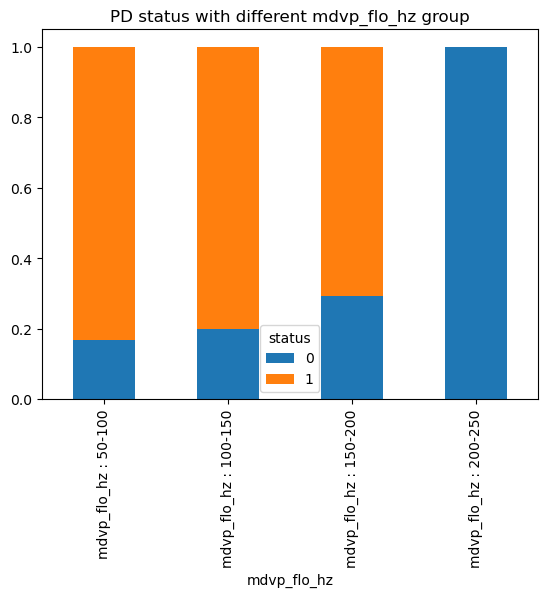

In [24]:
bins = [50,100,150,200,250]                                         # defining mdvp_flo_hz bins,
# defining labels of mdvp_flo_hz groups as per bins defined as above
mdvp_flo_hz_group = ['mdvp_flo_hz : 50-100', 'mdvp_flo_hz : 100-150', 'mdvp_flo_hz : 150-200', 'mdvp_flo_hz : 200-250']
pdData_mdvp_flo_hz_bin = pd.cut(df[feature],bins,labels=mdvp_flo_hz_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to mdvp_flo_hz_group_col variable
mdvp_flo_hz_group_col = pd.crosstab(pdData_mdvp_flo_hz_bin,df.status).apply(lambda r: r/r.sum()*100, axis=1)
print(mdvp_flo_hz_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
mdvp_flo_hz_group_col.div(mdvp_flo_hz_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different mdvp_flo_hz group")

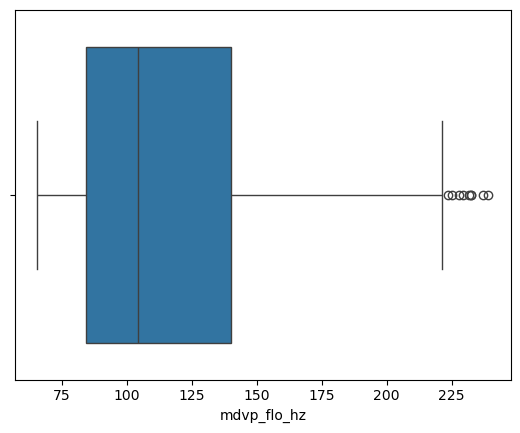

In [25]:
ax = sns.boxplot(x=df[feature])        # seaborn boxplot to examine outliers of the feature

<Axes: xlabel='status', ylabel='mdvp_flo_hz'>

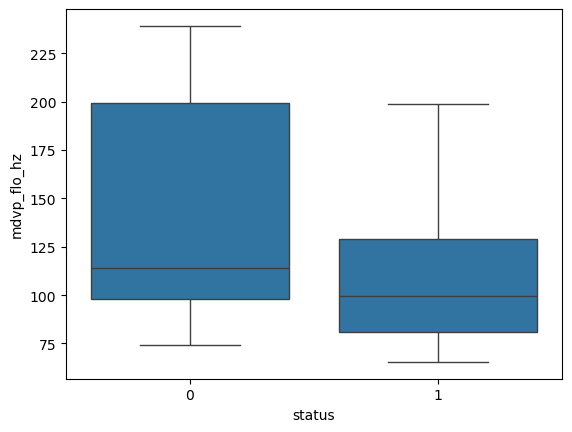

In [26]:
sns.boxplot(x=df['status'],y=df[feature]) 

# Step 5 | Visualization

df["status"].value_counts() ###is used to count the occurrences of each unique value in the "status" column of the DataFrame d

In [29]:
def plot_data(df, plot_type, grid_size, fig_size, y = None):
    fig = plt.figure(figsize = fig_size)
    column_names = df.select_dtypes(exclude='object').columns
    for i, column_name in enumerate(column_names):
        fig.add_subplot(grid_size[0], grid_size[1], i + 1)
        if plot_type == 'hist':
            plot = sns.histplot(df[column_name], kde = True, color = 'darkblue')
        elif plot_type == 'boxplot':
             plot = sns.boxplot(y=df[column_name], x=y, color = 'red')
        else:
            raise ValueError("Input value for the parameter 'plot_type' should be 'hist' or 'boxplot'.")
        plot.set_xlabel(column_name, fontsize = 16)
    plt.tight_layout()

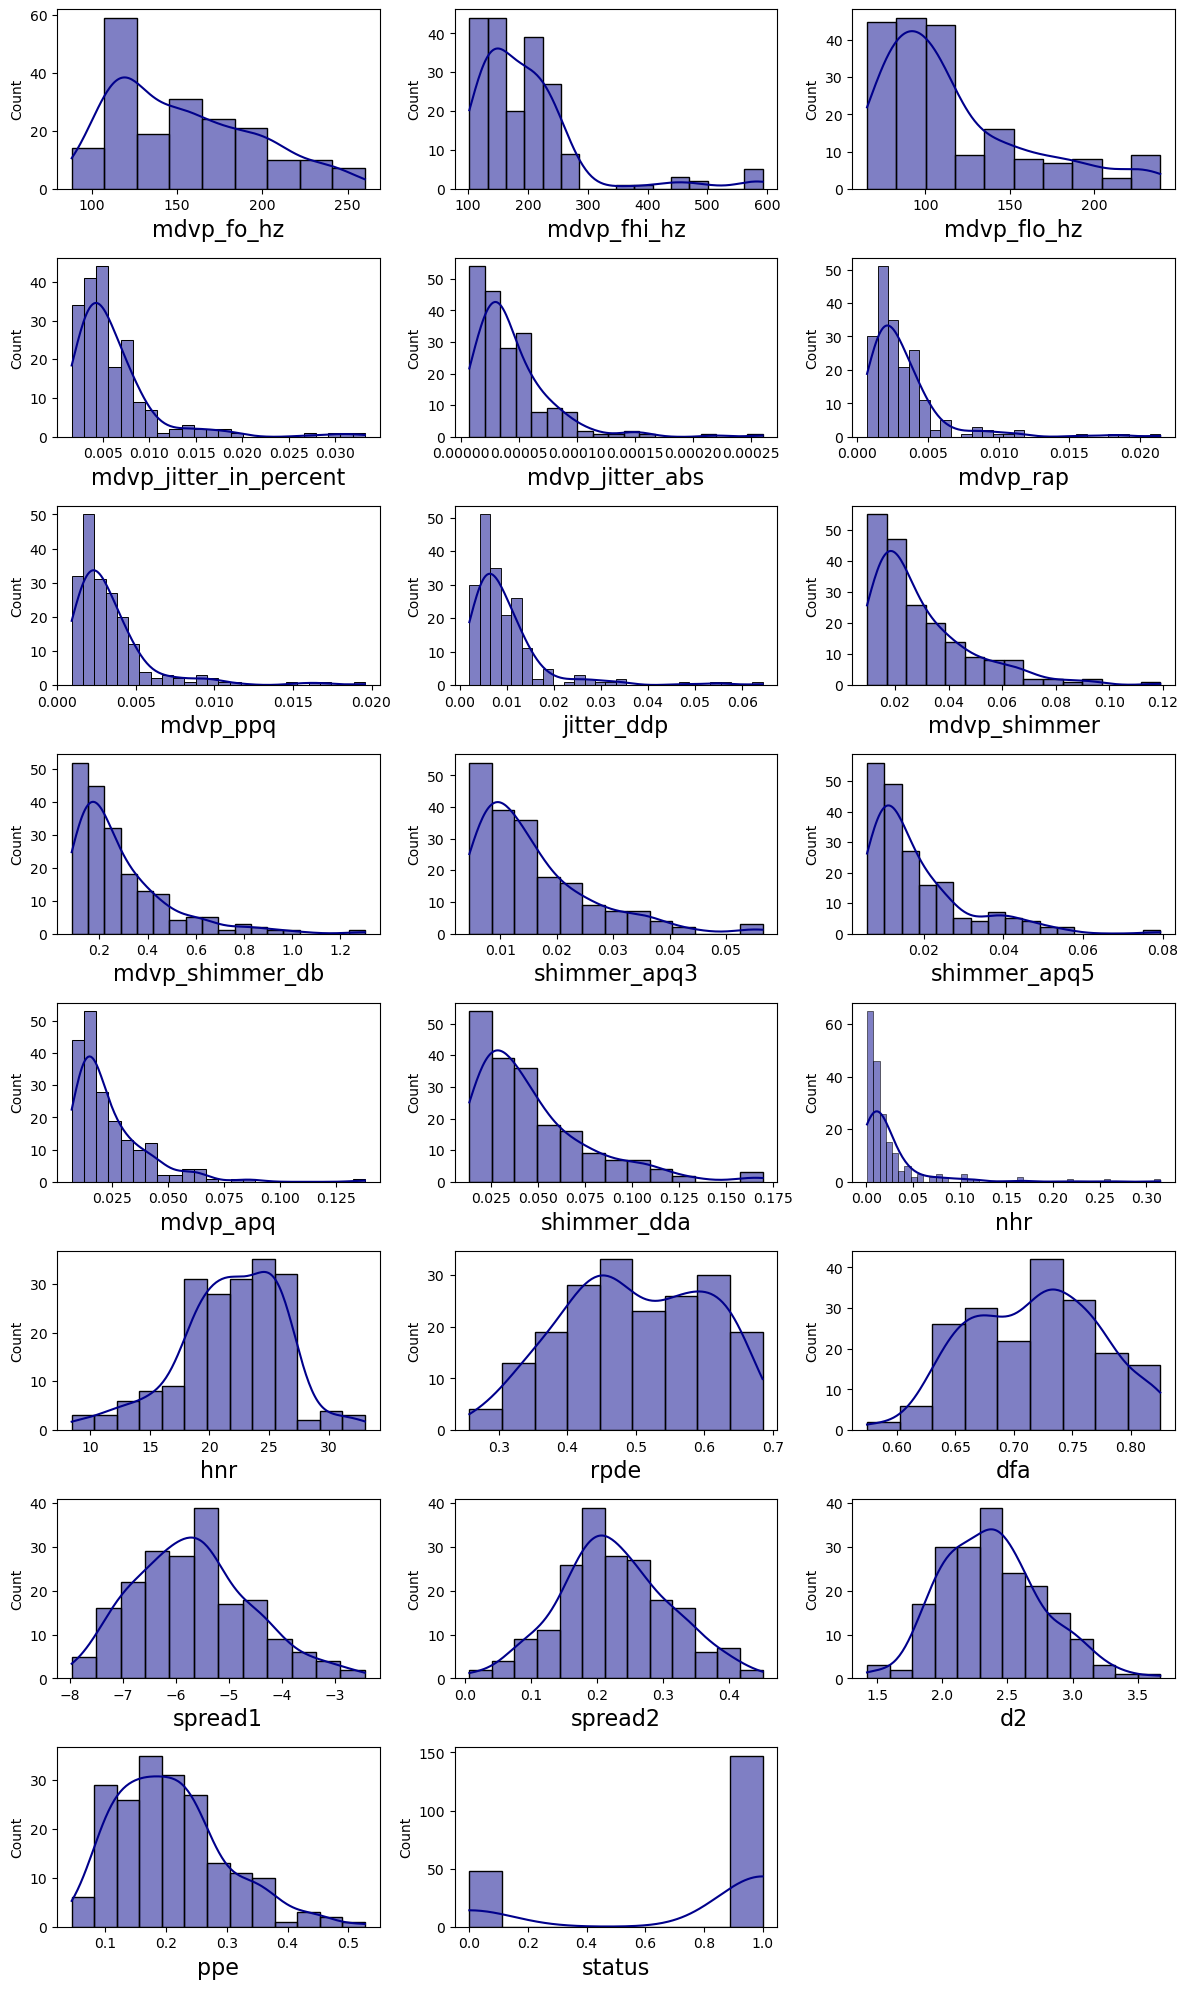

In [30]:
plot_data(df, plot_type = 'hist', grid_size = (8,3), fig_size = (12, 20))

C:\Users\ANIKET\AppData\Local\Temp\ipykernel_25052\490736232.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.countplot(df, x='status', palette=['grey', 'blue'], edgecolor='black', linewidth=3, alpha=0.9)


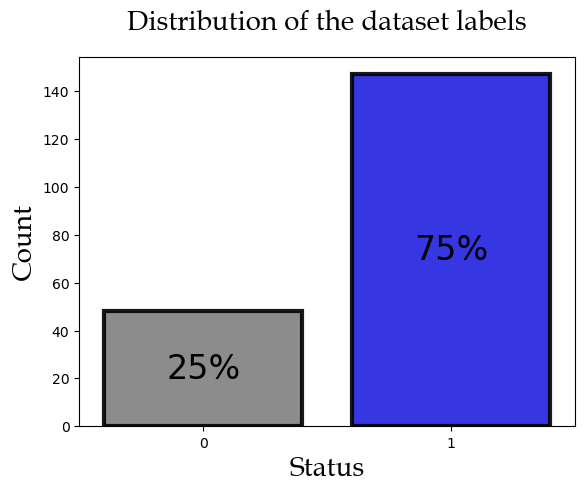

In [31]:
fig = sns.countplot(df, x='status', palette=['grey', 'blue'], edgecolor='black', linewidth=3, alpha=0.9)

total = len(df['status'])

for p in fig.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() / 2
    fig.annotate(percentage, (x, y), ha='center', va='center', color='Black', fontsize=24)
    
fig.set_xlabel('Status', fontsize=20, fontfamily='Book Antiqua')
fig.set_ylabel('Count', fontsize=20, fontfamily='Book Antiqua')

plt.title('Distribution of the dataset labels',y = 1.05, fontsize=20, fontfamily='Book Antiqua')
plt.show()

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, precision_score, recall_score, auc,roc_curve,accuracy_score,f1_score
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from termcolor import colored
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [33]:
non_numeric_columns = df.select_dtypes(exclude=['float', 'int']).columns
print(non_numeric_columns)

Index(['name'], dtype='object')


In [34]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for column in non_numeric_columns:
    df[column] = label_encoder.fit_transform(df[column])

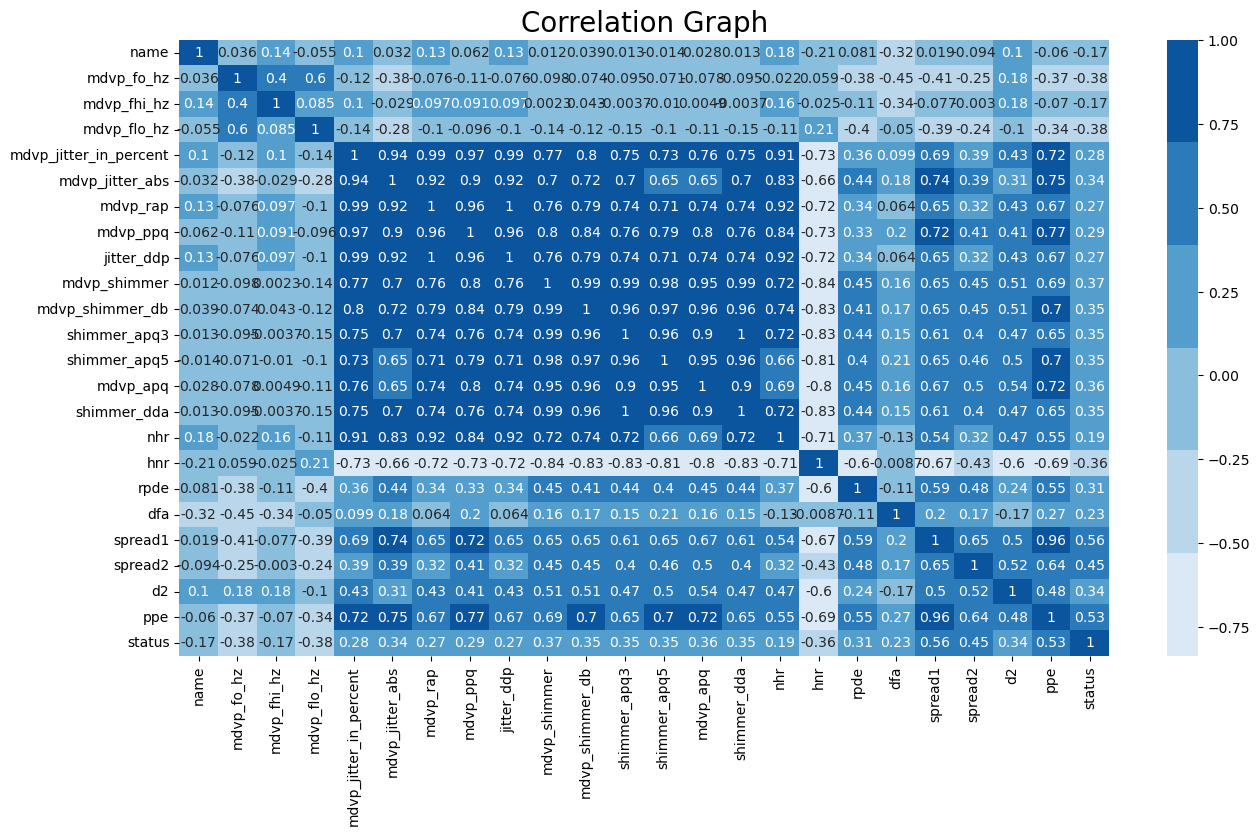

In [35]:
plt.figure(figsize=[15, 8], dpi=100)
plt.title("Correlation Graph", fontsize=20)

# Create a blue color map
cmap = sns.color_palette("Blues")

sns.heatmap(df.corr(), annot=True, cmap=cmap)

plt.show()

# Note:
• The depicted plot reveals significant correlations among the variables 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', and 'Shimmer:DDA'. Similarly, the variables 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', and 'Jitter:DDP' also exhibit strong correlations. This outcome aligns with the data description's indication that these variables represent distinct measurements of the same underlying attribute.

In [36]:
correlation = df.corr()
status_corr = correlation.sort_values(by='status', ascending = False).iloc[:,-7]

In [37]:
status_corr.to_frame().style.background_gradient(cmap='Blues')

,rpde
status,0.308567
spread1,0.591117
ppe,0.545886
spread2,0.479905
mdvp_shimmer,0.447424
mdvp_apq,0.451379
shimmer_apq5,0.399903
mdvp_shimmer_db,0.410684
shimmer_apq3,0.435242
shimmer_dda,0.435237


<Axes: >

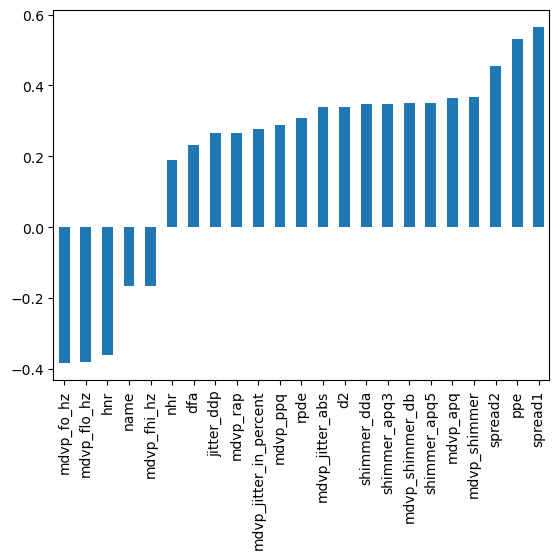

In [38]:
df.corr()['status'][:-1].sort_values().plot(kind='bar')

# Step 6 | Modeling

In [39]:
# Define the features (X) and the output labels (y)
X=df.drop(['name','status'],axis=1)
y=df["status"]

In [40]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Create an instance of MinMaxScaler
minmax = MinMaxScaler()

X_train_scaled = minmax.fit_transform(X_train)
X_test_scaled = minmax.transform(X_test)

In [42]:
def Evaluate_Performance(Model, Xtrain, Xtest, Ytrain, Ytest) : 
    Model.fit(Xtrain,Ytrain)
    overall_score = cross_val_score(Model, Xtrain,Ytrain, cv=10)
    model_score = np.average(overall_score)
    Ypredicted = Model.predict(Xtest)
    print("\n • Training Accuracy Score : ", round(Model.score(Xtrain, Ytrain) * 100,2))
    print(f" • Cross Validation Score : {round(model_score * 100,2)}")
    print(colored(" ❖ Testing Accuracy Score : ", attrs=['bold']),
          colored(f"{round(accuracy_score(Ytest, Ypredicted) * 100,2)}", color='black', attrs=['bold']))
    print(' • Precision Score is :', round(precision_score(Ytest, Ypredicted) * 100,2))
    print(' • Recall Score is :', round(recall_score(Ytest, Ypredicted) * 100,2))
    print(' • F1-Score Score is :', round(f1_score(Ytest, Ypredicted) * 100,2))
    print('-'*80)
    conf_matrix = confusion_matrix(Ytest,Ypredicted)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, annot_kws={"size": 16})
    plt.title('Predicted Labels',y = 1.05, fontsize=20, fontfamily='Times New Roman')
    plt.ylabel('True Labels', labelpad=25, fontsize=20, fontfamily='Times New Roman')
    plt.show()
    print('-'*80)

# Step 6.1 | Logestic Classification

--------------------------------------------------------------------------------
Logistic Regression :
----------------

 • Training Accuracy Score :  85.26
 • Cross Validation Score : 83.87
 ❖ Testing Accuracy Score :  89.74
 • Precision Score is : 88.89
 • Recall Score is : 100.0
 • F1-Score Score is : 94.12
--------------------------------------------------------------------------------


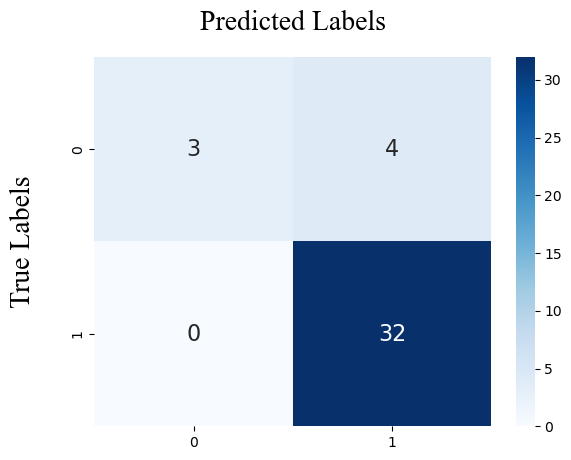

--------------------------------------------------------------------------------


In [43]:
LR = LogisticRegression()
LR.fit(X_train_scaled,y_train)
y_pred_LR = LR.predict(X_test_scaled)
print('-'*80)
print("Logistic Regression :")
print("-"*16)
Evaluate_Performance(LR, X_train_scaled, X_test_scaled, y_train, y_test)

In [44]:
cm=confusion_matrix(y_test,y_pred_LR)
TN=cm[0,0]
TP=cm[1,1]
FN=cm[0,1]
FP=cm[1,0]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [45]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8974358974358975 
 The Missclassification = 1-Accuracy =  0.10256410256410253 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.8888888888888888 
 Specificity or True Negative Rate = TN/(TN+FP) =  1.0 
 Positive Predictive value = TP/(TP+FP) =  1.0 
 Negative predictive Value = TN/(TN+FN) =  0.42857142857142855 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  inf 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.11111111111111116


C:\Users\ANIKET\AppData\Local\Temp\ipykernel_25052\1547213806.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',


# Step 6.2 | SVM

--------------------------------------------------------------------------------
Support Vector Machine:
----------------

 • Training Accuracy Score :  88.46
 • Cross Validation Score : 87.67
 ❖ Testing Accuracy Score :  89.74
 • Precision Score is : 88.89
 • Recall Score is : 100.0
 • F1-Score Score is : 94.12
--------------------------------------------------------------------------------


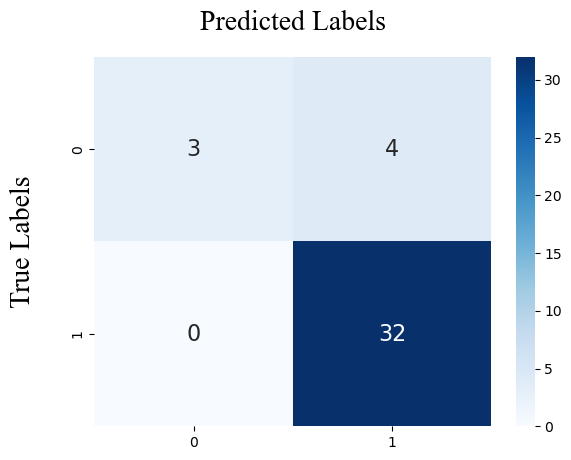

--------------------------------------------------------------------------------


In [46]:
SVM = SVC(probability=True, kernel = 'linear')
SVM.fit(X_train_scaled,y_train)
y_pred_SVM = SVM.predict(X_test_scaled)
print('-'*80)
print("Support Vector Machine:")
print("-"*16)
Evaluate_Performance(SVM, X_train_scaled, X_test_scaled, y_train, y_test)

# Step 6.3 | Decision Tree Classifier

--------------------------------------------------------------------------------
Decision Tree Classifier :
----------------

 • Training Accuracy Score :  100.0
 • Cross Validation Score : 87.21
 ❖ Testing Accuracy Score :  92.31
 • Precision Score is : 93.94
 • Recall Score is : 96.88
 • F1-Score Score is : 95.38
--------------------------------------------------------------------------------


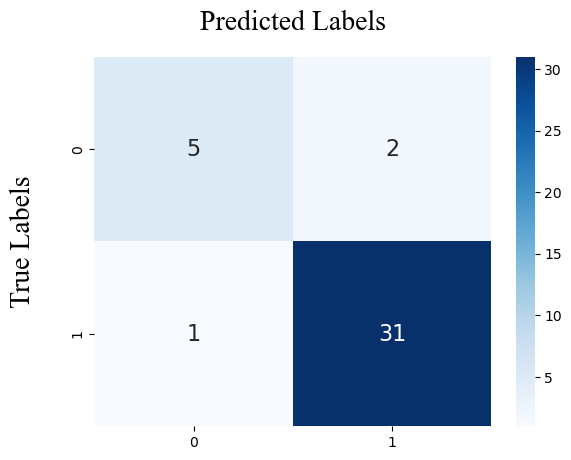

--------------------------------------------------------------------------------


DECISION TREE :


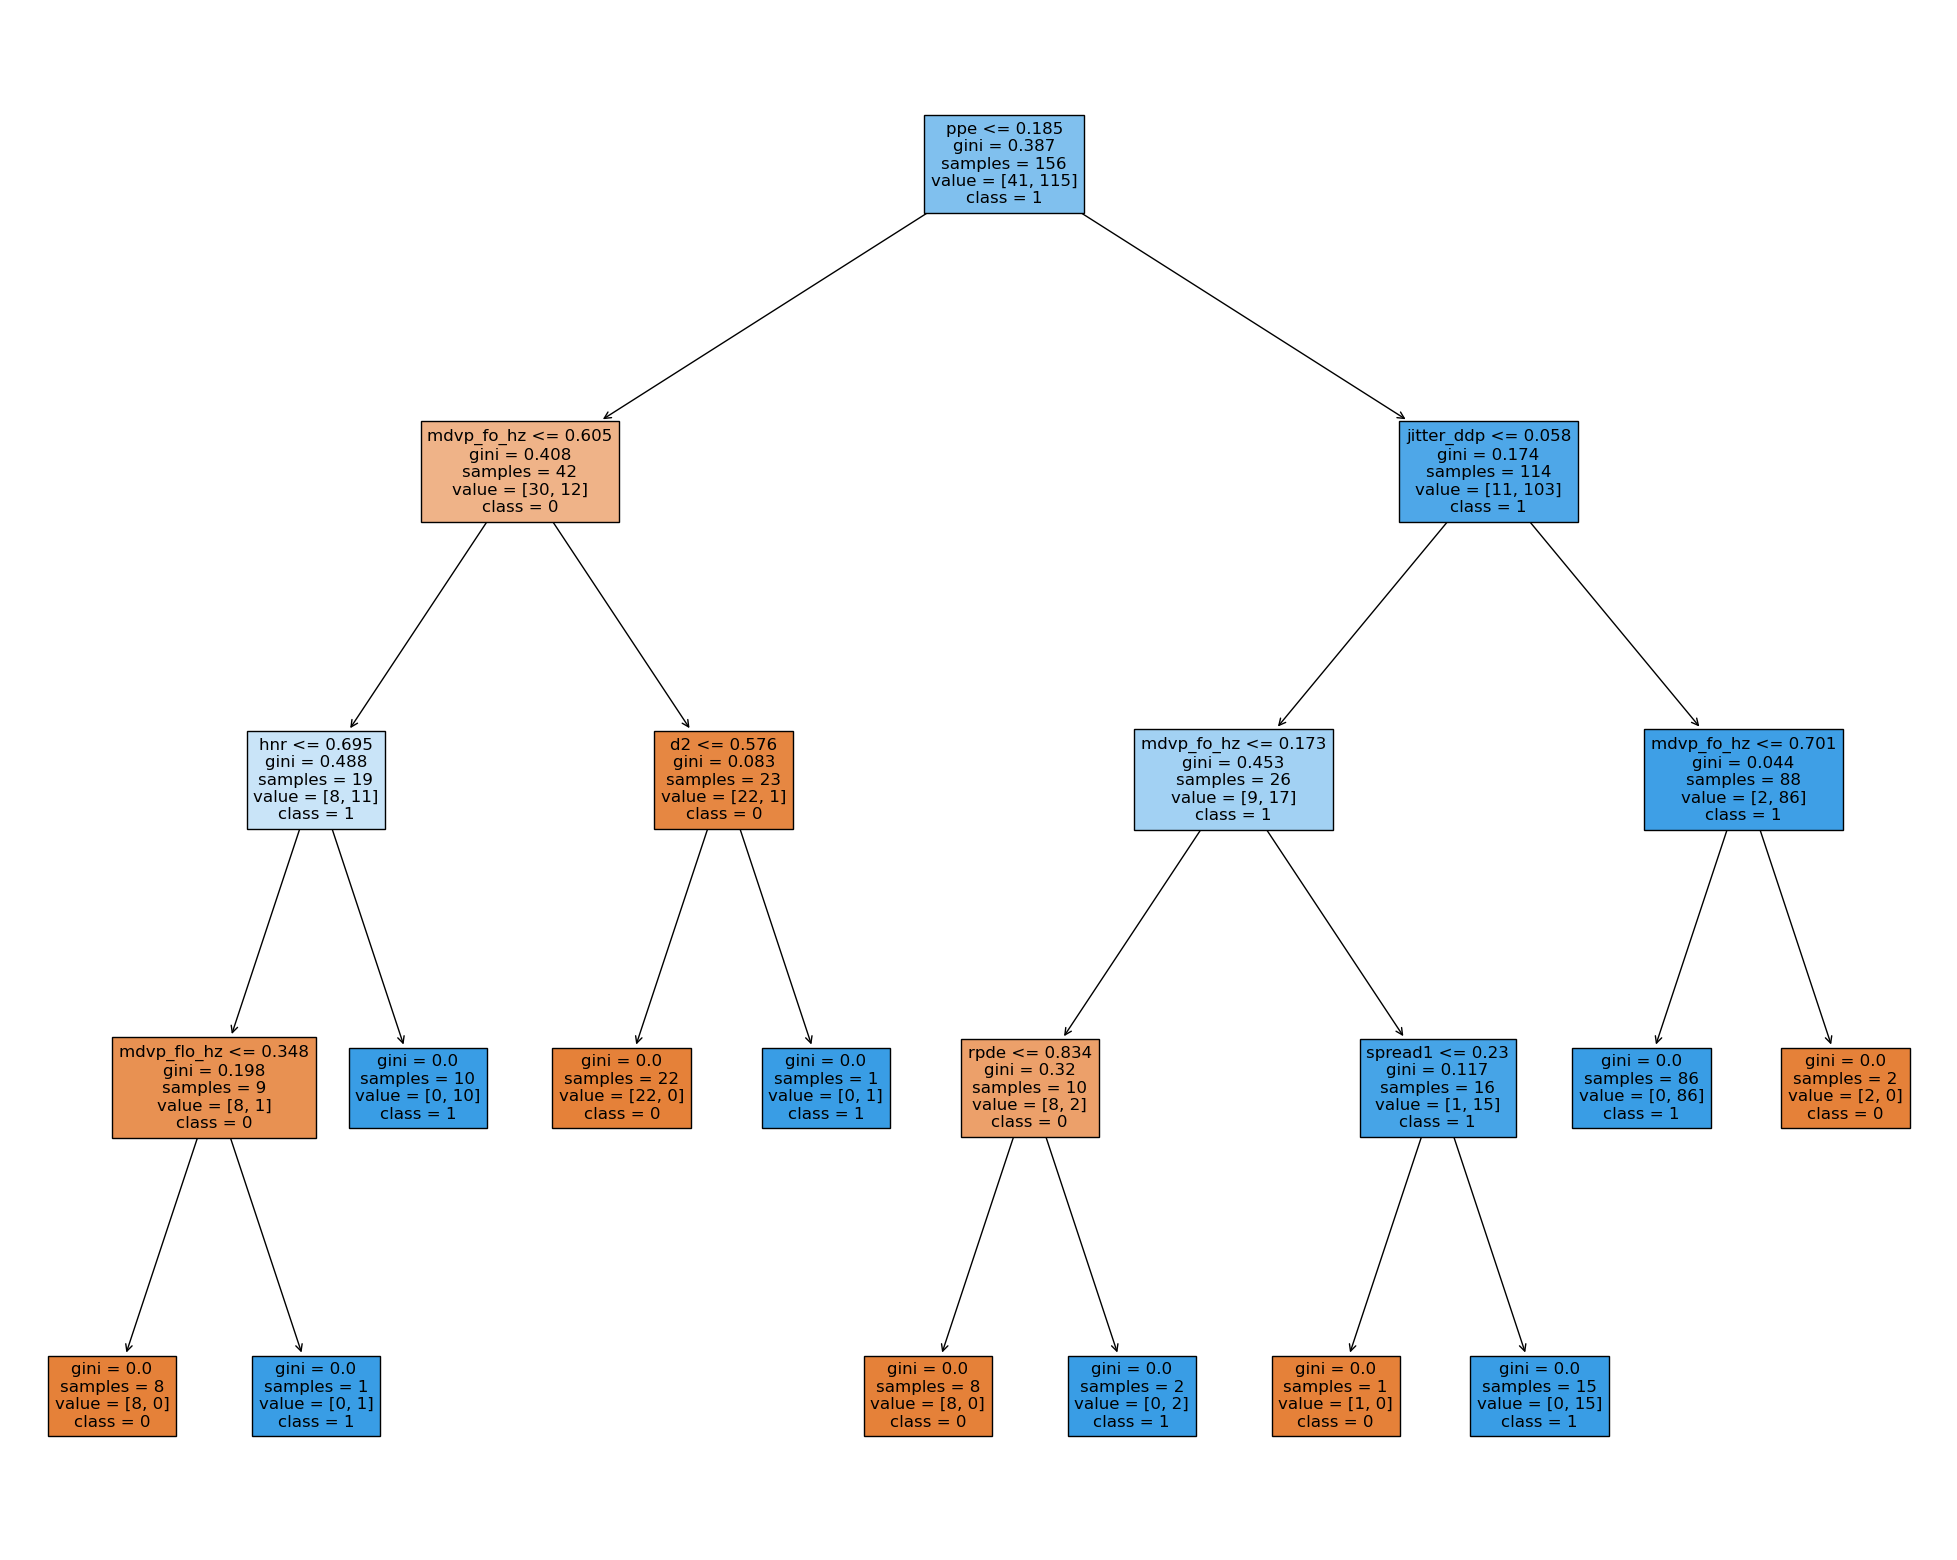

In [47]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train_scaled, y_train)
y_pred_DTC = DTC.predict(X_test_scaled)
print('-'*80)
print('Decision Tree Classifier :')
print("-"*16)
Evaluate_Performance(DTC, X_train_scaled, X_test_scaled, y_train, y_test)
print('\n')
print("DECISION TREE :")
fig = plt.figure(figsize=(25,20))
tree = plot_tree(DTC, feature_names = [ c for c in df.drop(['name'],axis=1).columns], class_names=['0','1'], filled=True)

In [48]:
from sklearn.model_selection import train_test_split, StratifiedKFold

# Define the base DT model
dt_base = DecisionTreeClassifier(random_state=0)

In [49]:
def tune_clf_hyperparameters(clf, param_grid, X_train_scaled, y_train, scoring='recall', n_splits=3):
    '''
    This function optimizes the hyperparameters for a classifier by searching over a specified hyperparameter grid. 
    It uses GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters. 
    The combination with the highest recall for class 1 is selected as the default scoring metric. 
    The function returns the classifier with the optimal hyperparameters.
    '''
    
    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train_scaled, y_train)

    # Get the best hyperparameters
    best_hyperparameters = clf_grid.best_params_
    
    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_, best_hyperparameters

In [50]:
# Hyperparameter grid for DT
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2]
}

In [51]:
# Call the function for hyperparameter tuning
best_dt, best_dt_hyperparams = tune_clf_hyperparameters(dt_base, param_grid_dt, X_train, y_train)
best_dt, best_dt_hyperparams

(DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0),
 {'criterion': 'entropy',
  'max_depth': 2,
  'min_samples_leaf': 1,
  'min_samples_split': 2})

# Step 6.4 | Random Forest Classifier

--------------------------------------------------------------------------------
Random Forest Classifier
----------------

 • Training Accuracy Score :  100.0
 • Cross Validation Score : 90.25
 ❖ Testing Accuracy Score :  94.87
 • Precision Score is : 94.12
 • Recall Score is : 100.0
 • F1-Score Score is : 96.97
--------------------------------------------------------------------------------


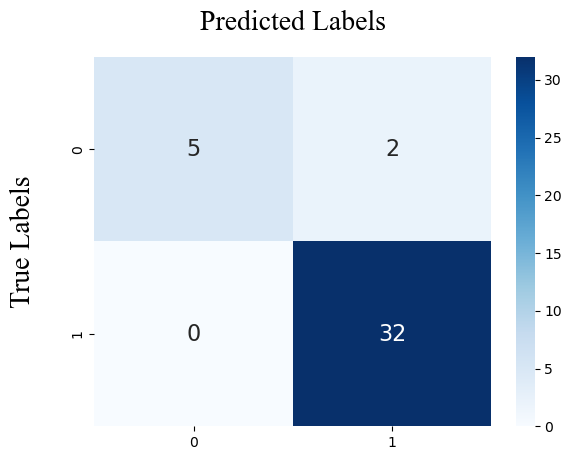

--------------------------------------------------------------------------------


In [52]:
RFC=RandomForestClassifier(n_estimators=150)
RFC.fit(X_train_scaled, y_train)
y_pred_RFC = RFC.predict(X_test_scaled)
print('-'*80)
print('Random Forest Classifier')
print("-"*16)
Evaluate_Performance(RFC, X_train_scaled, X_test_scaled, y_train, y_test)

# Step 6.5| K Nearest Neighbors Classifier

--------------------------------------------------------------------------------
Key- Nearest Neighbor :
----------------

 • Training Accuracy Score :  96.79
 • Cross Validation Score : 89.79
 ❖ Testing Accuracy Score :  94.87
 • Precision Score is : 94.12
 • Recall Score is : 100.0
 • F1-Score Score is : 96.97
--------------------------------------------------------------------------------


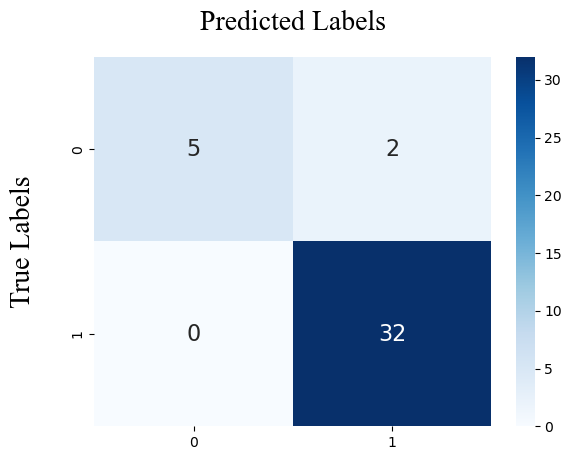

--------------------------------------------------------------------------------


In [53]:
KNN = KNeighborsClassifier()
KNN.fit(X_train_scaled, y_train)
y_pred_KNN = KNN.predict(X_test_scaled)
print('-'*80)
print("Key- Nearest Neighbor :")
print("-"*16)
Evaluate_Performance(KNN, X_train_scaled, X_test_scaled, y_train, y_test)

# Step 7 | Conclusion

In [54]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from IPython.display import display

# Assuming y_pred_LR, y_pred_SVM, y_pred_DTC, y_pred_RFC, y_pred_KNN are your prediction arrays
models = [
    ('Logistic Regression', y_pred_LR),
    ('Support Vector Machine(linear)', y_pred_SVM),
    ('Decision Tree', y_pred_DTC),
    ('Random Forest', y_pred_RFC),
    ('K-Nearest Neighbor', y_pred_KNN)
]

results = []
for model_name, y_pred in models:
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    results.append({
        'Model': model_name,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy
    })
    

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Define a function to highlight maximum values
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Apply the highlight_max function to the relevant columns
highlight_cols = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
results_df_highlighted = results_df.style.apply(highlight_max, subset=highlight_cols, axis=1)

print("Results without balancing the dataset:")
print('-' * 70)
# Use the display() function to show the styled DataFrame
display(results_df_highlighted)


Results without balancing the dataset:
----------------------------------------------------------------------


,Model,Precision,Recall,F1-Score,Accuracy
0,Logistic Regression,0.888889,1.000000,0.941176,0.897436
1,Support Vector Machine(linear),0.888889,1.000000,0.941176,0.897436
2,Decision Tree,0.939394,0.968750,0.953846,0.923077
3,Random Forest,0.941176,1.000000,0.969697,0.948718
4,K-Nearest Neighbor,0.941176,1.000000,0.969697,0.948718


In [55]:
first_scenario_results = [
    {'Model': 'Logistic Regression', 'Precision': precision_score(y_test, y_pred_LR) , 'Recall': recall_score(y_test, y_pred_LR) ,
     'F1-Score': f1_score(y_test, y_pred_LR) , 'Accuracy': accuracy_score(y_test, y_pred_LR)},
    
    {'Model': 'Support Vector Machine(linear)', 'Precision': precision_score(y_test, y_pred_SVM), 'Recall': recall_score(y_test, y_pred_SVM),
     'F1-Score': f1_score(y_test, y_pred_SVM), 'Accuracy': accuracy_score(y_test, y_pred_SVM)},
    
    {'Model': 'Decision Tree', 'Precision': precision_score(y_test, y_pred_DTC), 'Recall': recall_score(y_test, y_pred_DTC),
     'F1-Score': f1_score(y_test, y_pred_DTC), 'Accuracy': accuracy_score(y_test, y_pred_DTC)},
    
    {'Model': 'Random Forest', 'Precision': precision_score(y_test, y_pred_RFC), 'Recall': recall_score(y_test, y_pred_RFC),
     'F1-Score': f1_score(y_test, y_pred_RFC), 'Accuracy': accuracy_score(y_test, y_pred_RFC)}, 

    {'Model': 'K-Nearest Neighbor', 'Precision': precision_score(y_test, y_pred_KNN), 'Recall': recall_score(y_test, y_pred_KNN),
     'F1-Score': f1_score(y_test, y_pred_KNN), 'Accuracy': accuracy_score(y_test, y_pred_KNN)},
    
]
first_scenario_results = pd.DataFrame(first_scenario_results).style.set_properties(**{'font-weight': 'bold'}, subset=pd.IndexSlice[[3,4], :])
print("Results without balancing the dataset : ")
print('-'*70)
first_scenario_results

Results without balancing the dataset : 
----------------------------------------------------------------------


,Model,Precision,Recall,F1-Score,Accuracy
0,Logistic Regression,0.888889,1.000000,0.941176,0.897436
1,Support Vector Machine(linear),0.888889,1.000000,0.941176,0.897436
2,Decision Tree,0.939394,0.968750,0.953846,0.923077
3,Random Forest,0.941176,1.000000,0.969697,0.948718
4,K-Nearest Neighbor,0.941176,1.000000,0.969697,0.948718


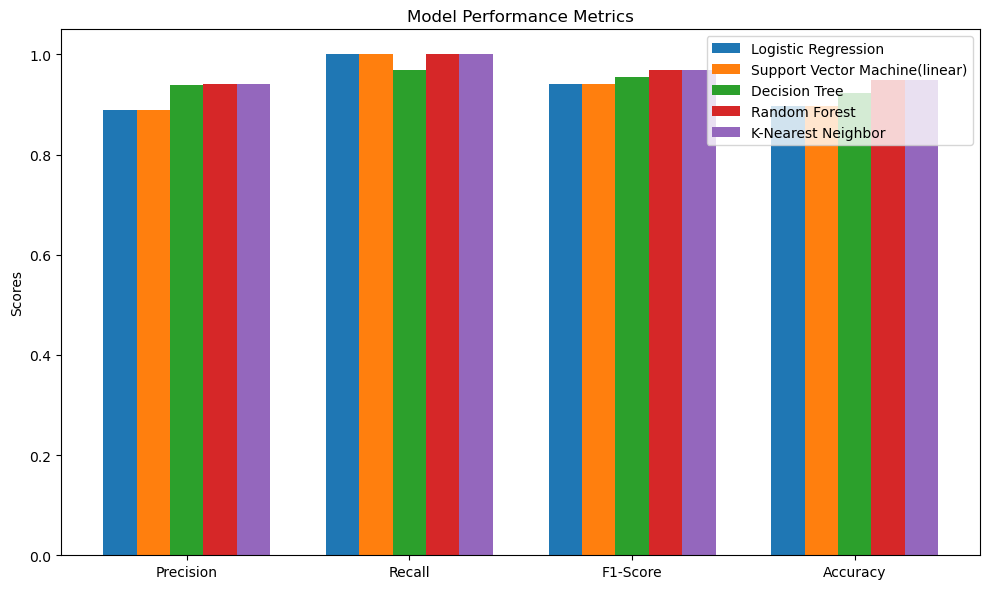

In [56]:
# Your result data
data = [
    {'Model': 'Logistic Regression', 'Precision': 0.888889, 'Recall': 1.000000, 'F1-Score': 0.941176, 'Accuracy': 0.897436},
    {'Model': 'Support Vector Machine(linear)', 'Precision': 0.888889, 'Recall': 1.000000, 'F1-Score': 0.941176, 'Accuracy': 0.897436},
    {'Model': 'Decision Tree', 'Precision': 0.939394, 'Recall': 0.968750, 'F1-Score': 0.953846, 'Accuracy': 0.923077},
    {'Model': 'Random Forest', 'Precision': 0.941176, 'Recall': 1.000000, 'F1-Score': 0.969697, 'Accuracy': 0.948718},
    {'Model': 'K-Nearest Neighbor', 'Precision': 0.941176, 'Recall': 1.000000, 'F1-Score': 0.969697, 'Accuracy': 0.948718}
]

# Create a DataFrame from the data
results_df = pd.DataFrame(data)

# Set the Model column as the index
results_df.set_index('Model', inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
x = np.arange(len(metrics))
width = 0.15

for i, model in enumerate(results_df.index):
    values = results_df.loc[model, metrics]
    ax.bar(x + i * width, values, width, label=model)

ax.set_ylabel('Scores')
ax.set_title('Model Performance Metrics')
ax.set_xticks(x + (len(results_df) / 2 - 0.5) * width)
ax.set_xticklabels(metrics)
ax.legend()

plt.tight_layout()
plt.show()

# Note:

Logistic Regression and Support Vector Machine (linear): Both models have high precision, recall, and F1-scores of around 0.89 to 0.94, and accuracy of 0.897. This suggests that they are performing well on this dataset, correctly identifying and predicting positive instances.
Decision Tree: The decision tree model has slightly higher precision and recall than the linear models, with an F1-score of 0.953. This indicates that the decision tree is effectively capturing the relationships in the data and providing a good balance between precision and recall.
Random Forest:The random forest model has high precision, recall, and F1-score of around 0.94 to 0.97, and accuracy of 0.949. It's performing well, similar to the decision tree, but with potentially better generalization due to the ensemble nature of the random forest.
K-Nearest Neighbor:This model also has high precision, recall, and F1-score of around 0.94 to 0.97, and accuracy of 0.949. It's showing similar performance to the decision tree and random forest models.​